# Titanic: Using Deep learning model which achive the accuracy of 80%

# Introduction...

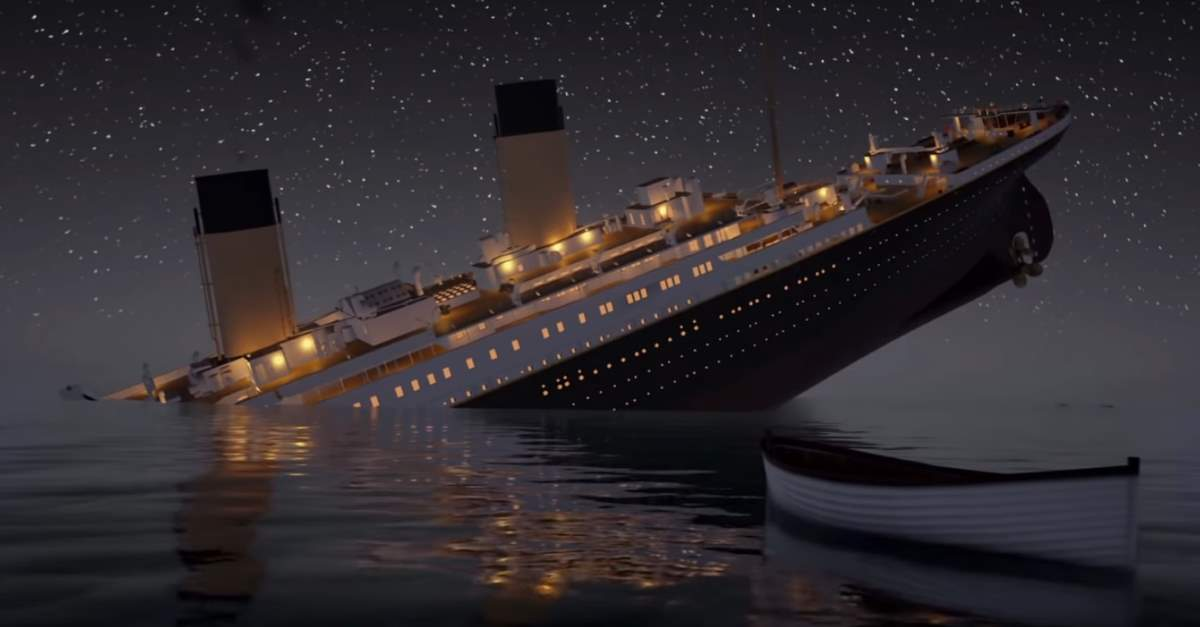

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. 

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.




## Let understand the Problem statment...

In this challenge, we have to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

## Start Diving into it...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the dataset

In [3]:
train = pd.read_csv('./titanic/train.csv')

test = pd.read_csv("./titanic/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Little more about the dataset..
The data has been split into two groups:

training set (train.csv) test set (test.csv) The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## Data Defination...


* survival Survival 0 = No, 1 = Yes

* pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

* sex Male or Female

* Age Age in years

* sibsp # of siblings / spouses aboard the Titanic

* parch # of parents / children aboard the Titanic

* ticket Ticket number

* fare Passenger fare

* cabin Cabin number

* embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

* Variable Notes pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...

* Sibling = brother, sister, stepbrother, stepsister

* Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...

* Parent = mother, father

* Child = daughter, son, stepdaughter, stepson

* Some children travelled only with a nanny, therefore parch=0 for them


### Checking the dataset...

Checking the dataset for datatype, missing value etc...

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Cleaning Dataset...

ACtually dataset contain lot of missing values, unrelated column and also need to applying encoding of text etc.. for specific columns. so, let write some function for that.

In [8]:
def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] =  data['Age'].fillna(data['Age'].dropna().median())
    
    data.loc[data['Sex'] == 'male', 'Sex'] = 0
    data.loc[data['Sex'] =='female',  'Sex'] = 1
    
    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data["Embarked"] == 'S', 'Embarked'] = 0
    data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
    data.loc[data['Embarked'] == 'Q', 'Embarked'] =2

## Writing the Output in csv file for Submission

In [9]:
def write_prediction(prediction, name):
    PassengerId = np.array(test['PassengerId']).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ['Survived'])
    solution.to_csv(name, index_label = ['PassengerId'])

### Now clean the data by applying the above clean_data function..

In [10]:
clean_data(train)
clean_data(test)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


## Now again Check for missing values...

In [12]:
print('check the nan value in train data')
print(train.isnull().sum())

check the nan value in train data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [13]:
print('check the nan value in test data')
print(test.isnull().sum())

check the nan value in test data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## little more about the missing Values...

Handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

Missing values need to be handled because they reduce the quality for any of our performance metric. It can also lead to wrong prediction or classification and can also cause a high bias for any given model being used.

## WHAT DO WE DO TO MISSING VALUES?

There are several options for handling missing values each with its own PROS and CONS. However, the choice of what should be done is largely dependent on the nature of our data and the missing values. Below is a summary highlight of several options we have for handling missing values.

1. DROP MISSING VALUES
2. FILL MISSING VALUES WITH TEST STATISTIC(mean, median, mode).
3. PREDICT MISSING VALUE WITH A MACHINE LEARNING ALGORITHM(knn).

There are lot more in this.I recommend to review this article.[click here](https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d)

**But in our case,  Cabin Featueres has more than 75% of missing data in both Test and train data so we are Drop the Cabin column**

In [14]:
drop_column = ['Cabin']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


## Now let understand about data...

/Users/jason_lim/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


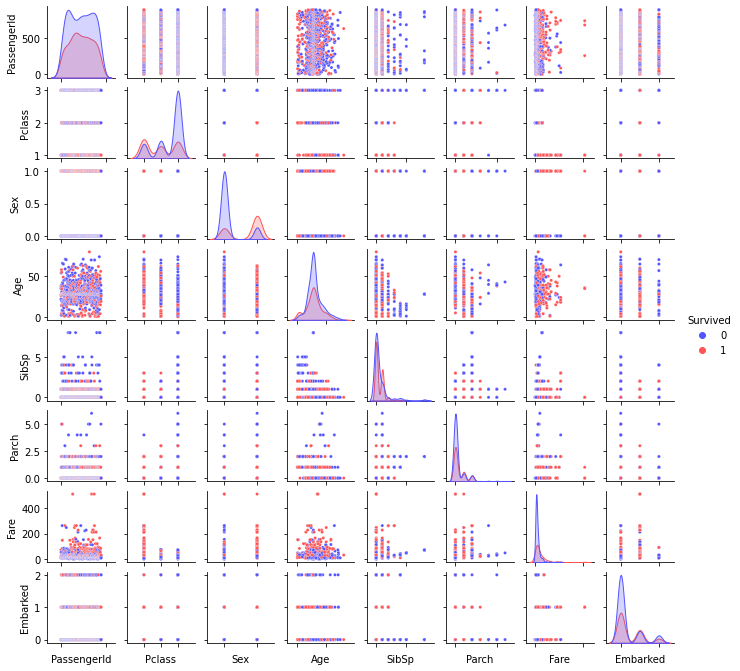

In [17]:
g = sns.pairplot(data=train, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

## Applying Feature Engineering...

Now we have clear idea of dependencies of different fetarue on survival of a person. Let's apply Feature Engineering to extract some more features.

Feature engineering is the art of converting raw data into useful features. There are several feature engineering techniques that you can apply to be an artist.

In [18]:
## combine test and train as single to apply some function and applying the feature scaling
all_data=[train,test]

### Creating a features "Family size" corresponding to sibsp and Parch...

As we see above sibsp and Parch are weak feature to decide the survival but with the help of this we can generate the new feature "Family size". which can effect the survival more.

In [19]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

## Creating new feature "Title"...

Actually name doesn't contribute much to decide the survival of a person, but title might help to impact the survival like "miss" and "mrs" are greater chance to survive than "mr".

In [20]:
# Define function to extract titles from passenger names
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

## Creating the feature "Age"...

In this we divide the age column into three age group, children, teenage, adult, elder on basis of thier age division.

In [21]:
## create Range for age features
for dataset in all_data:
    dataset['Age_Range'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

## Creating feature "Fare"...

Actually fare may or, may not impact directly on survival but, when we divide the fare into fare range like low_fare, median_fare, Averga_fare, and high_fare then we get little bit idea of a people where it present like in first floor, second floor etc.. when incident occur. Beacuse it's position give higher response time to save himself.

In [22]:
## create RAnge for fare features
for dataset in all_data:
    dataset['Fare_Range'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [23]:
#Avoiding dataloss making a copy of both DataSet start working for copy of dataset
traindf=train
testdf=test

In [24]:
all_dat=[traindf,testdf]

In [25]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [26]:
#Removing the passenger id from trainning set 
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [27]:
all_dat

[     Survived  Pclass Sex  SibSp  Parch Embarked  FamilySize Title Age_Range  \
 0           0       3   0      1      0        0           2    Mr     Adult   
 1           1       1   1      1      0        1           2   Mrs     Adult   
 2           1       3   1      0      0        0           1  Miss     Adult   
 3           1       1   1      1      0        0           2   Mrs     Adult   
 4           0       3   0      0      0        0           1    Mr     Adult   
 ..        ...     ...  ..    ...    ...      ...         ...   ...       ...   
 886         0       2   0      0      0        0           1  Rare     Adult   
 887         1       1   1      0      0        0           1  Miss   Teenage   
 888         0       3   1      1      2        0           4  Miss     Adult   
 889         1       1   0      0      0        1           1    Mr     Adult   
 890         0       3   0      0      0        2           1    Mr     Adult   
 
        Fare_Range  
 0   

### As we only cascade the test and train data for applying the feature engeering. We donot mix the train and test data.cascading help in apply feature in single run of code not applying seperately for test and train.And we able to use train and test data sepreatly.

In [28]:
testdf.head(5)


,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_Range,Fare_Range
0,892,3,0,0,0,2,1,Mr,Adult,Low_fare
1,893,3,1,1,0,0,2,Mrs,Elder,Low_fare
2,894,2,0,0,0,2,1,Mr,Elder,median_fare
3,895,3,0,0,0,0,1,Mr,Adult,median_fare
4,896,3,1,1,1,0,3,Mrs,Adult,median_fare


In [29]:
#Adding the extra feataure in Train data set
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_Range","Embarked","Fare_Range"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])


In [30]:
traindf.head()

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,0,2,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
1,1,1,1,0,2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,1,3,0,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,0,2,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0,3,0,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [31]:
#Adding the extra feature in test data set
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_Range","Embarked","Fare_Range"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [32]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,893,3,1,0,2,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,894,2,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,895,3,0,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4,896,3,1,1,3,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [33]:
#For precaution let final check the training set...
print(traindf.isnull().sum())

Survived                  0
Pclass                    0
SibSp                     0
Parch                     0
FamilySize                0
Sex_0                     0
Sex_1                     0
Title_Master              0
Title_Miss                0
Title_Mr                  0
Title_Mrs                 0
Title_Rare                0
Age_type_Children         0
Age_type_Teenage          0
Age_type_Adult            0
Age_type_Elder            0
Em_type_0                 0
Em_type_1                 0
Em_type_2                 0
Fare_type_Low_fare        0
Fare_type_median_fare     0
Fare_type_Average_fare    0
Fare_type_high_fare       0
dtype: int64


## Analyze the Correlation between Features...

Now finally merge all the features and understand the correlation between each features....

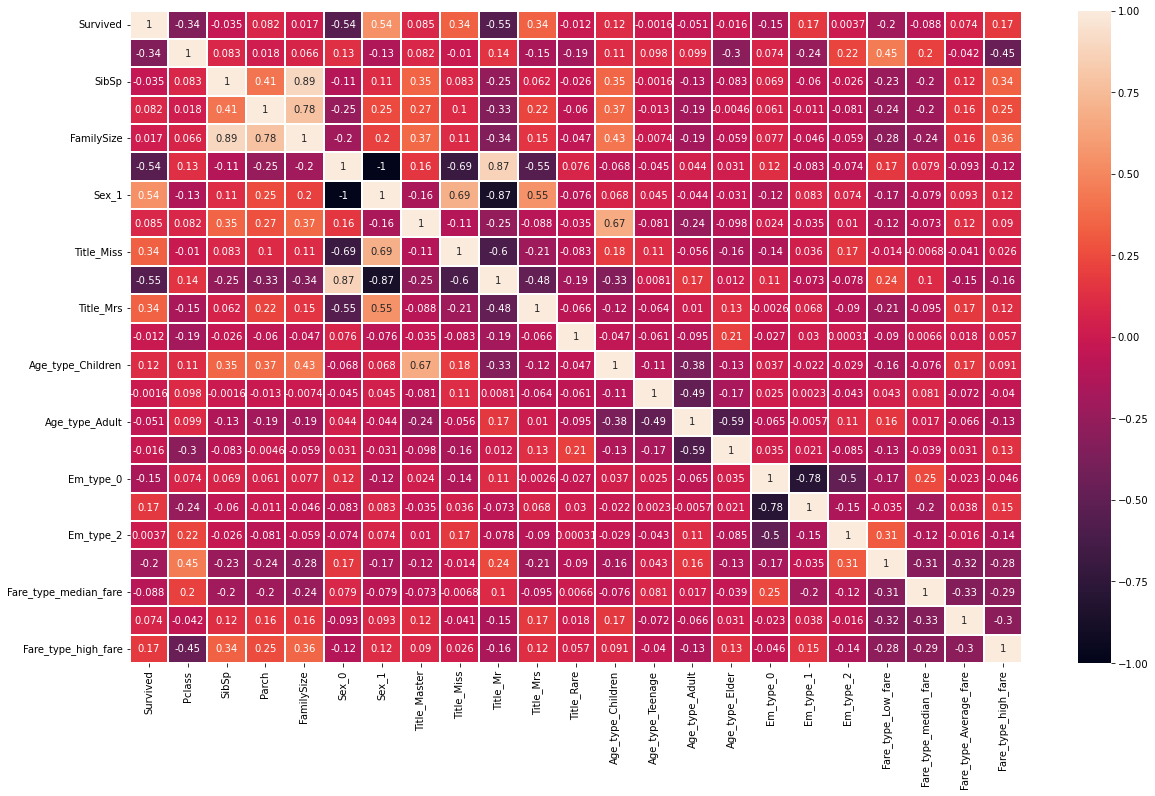

In [34]:
sns.heatmap(traindf.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

### Selecting Feature from training set to feed to the neural networks

In [35]:
target = traindf['Survived'].values
features = traindf[['Pclass','SibSp','Parch','FamilySize','Sex_0','Sex_1','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Rare','Age_type_Children','Age_type_Teenage','Age_type_Adult','Age_type_Elder','Em_type_0','Em_type_1','Em_type_2','Fare_type_Low_fare','Fare_type_median_fare','Fare_type_Average_fare','Fare_type_high_fare']].values

## Creating the Model...

In [36]:
import keras

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=22, units=11, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                253       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dropout_1 (Dropout)         (None, 11)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 60        
                                                                 
 dense_4 (Dense)             (None, 1)                 6

2022-03-04 15:08:29.895130: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
history=classifier.fit(features, target, batch_size = 10, epochs = 100,
    validation_split=0.1,verbose = 1,shuffle=True)

Epoch 1/100
81/81 [==============================] - 1s 3ms/step - loss: 0.6890 - accuracy: 0.6155 - val_loss: 0.6801 - val_accuracy: 0.6222
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6155 - val_loss: 0.6030 - val_accuracy: 0.6222
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.6155 - val_loss: 0.5591 - val_accuracy: 0.6222
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.6155 - val_loss: 0.5255 - val_accuracy: 0.6222
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.6417 - val_loss: 0.5143 - val_accuracy: 0.7889
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7728 - val_loss: 0.5041 - val_accuracy: 0.8111
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7915 - val_loss: 0.4982 - val_accuracy: 0.8111
Epoch 8/100
8

Epoch 59/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.7965 - val_loss: 0.4440 - val_accuracy: 0.8556
Epoch 60/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.8040 - val_loss: 0.4435 - val_accuracy: 0.8667
Epoch 61/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8102 - val_loss: 0.4372 - val_accuracy: 0.8444
Epoch 62/100
81/81 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.8040 - val_loss: 0.4385 - val_accuracy: 0.8444
Epoch 63/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7928 - val_loss: 0.4328 - val_accuracy: 0.8556
Epoch 64/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8002 - val_loss: 0.4348 - val_accuracy: 0.8556
Epoch 65/100
81/81 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.8015 - val_loss: 0.4369 - val_accuracy: 0.8556
Epoch 

## preparing the test set for prediction...

In [41]:
drop_column = ['PassengerId']
testdf.drop(drop_column, axis=1, inplace = True)
testdf.head()

,Pclass,SibSp,Parch,FamilySize,Sex_0,Sex_1,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_0,Em_type_1,Em_type_2,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,3,1,0,2,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0
2,2,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,3,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,3,1,1,3,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [42]:
#predicting the results
Y_pred = classifier.predict(testdf)

In [43]:
Y_pred.dtype

dtype('float32')

In [44]:
#Round off the result for submission
Y_pred=Y_pred.round()
Y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

## Writing the Prediction...

In [45]:
#Call above write function to write the out for submission
write_prediction(Y_pred, "My_output.csv")

Or You can also use the below code for writing the output

In [ ]:
# predictions = classifier.predict(testdf)
# predictions = pd.DataFrame(predictions, columns=['Survived'])
# test = pd.read_csv(os.path.join('../input', 'test.csv'))
# predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
# predictions.to_csv('my_output.csv', sep=",", index = False)